In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('ds_project_3_train.csv')
df_test = pd.read_csv('ds_project_3_test.csv')

In [2]:
# Data training (y)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Data testing (X)
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
# MEMILIH DATA YANG SEDERHANA

df_train = df_train[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']]
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,208500
1,9600,1976,6,8,1262,NaN,460,TA,181500
2,11250,2001,7,5,1786,NaN,608,Gd,223500
3,9550,1915,7,5,1717,NaN,642,Gd,140000
4,14260,2000,8,5,2198,NaN,836,Gd,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,175000
1456,13175,1978,6,6,2073,NaN,500,TA,210000
1457,9042,1941,7,9,2340,Shed,252,Gd,266500
1458,9717,1950,5,6,1078,NaN,240,Gd,142125


In [7]:
df_test = df_test[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual']]
df_test

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,11622,1961,5,6,896,NaN,730.0,TA
1,14267,1958,6,6,1329,Gar2,312.0,Gd
2,13830,1997,5,5,1629,NaN,482.0,TA
3,9978,1998,6,6,1604,NaN,470.0,Gd
4,5005,1992,8,5,1280,NaN,506.0,Gd
...,...,...,...,...,...,...,...,...
1454,1936,1970,4,7,1092,NaN,0.0,TA
1455,1894,1970,4,5,1092,NaN,286.0,TA
1456,20000,1960,5,7,1224,NaN,576.0,TA
1457,10441,1992,5,5,970,Shed,0.0,TA


In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

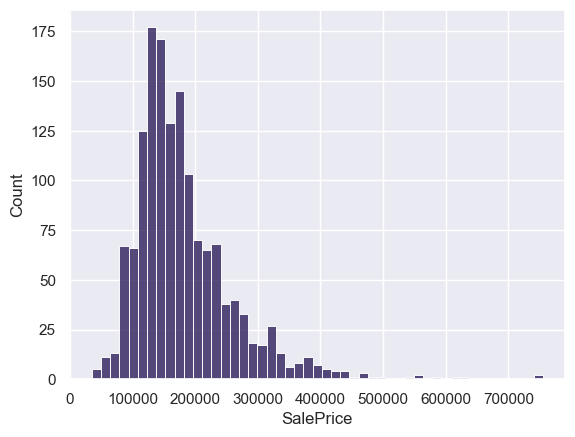

In [9]:
# membuat histplot dari Sales Price
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice'])

In [10]:
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


**hasil:**

* skewness 1.8 = lebih dari 0 maka tidak rata dan lebih condongke kiri(harus rata : 0)

* kurtosis = 6.5 terlalu lancip ( yang benar tidak terlalu tinggi dan kaki - kakinya rata)

**kesimpulan :** hasil tidak normal

    

**Scatterplot GrLivArea terhadap terget variable**

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

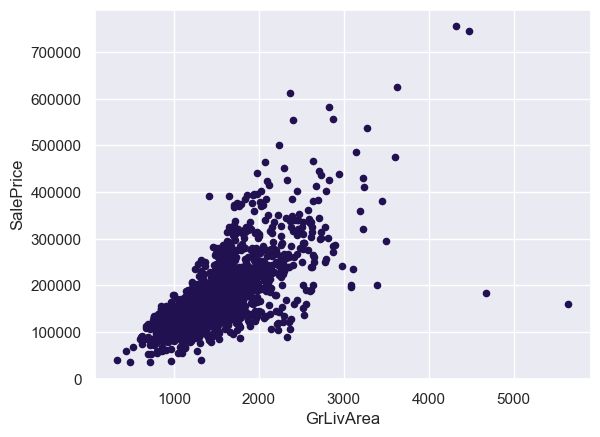

In [11]:
# data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

**hasil**:
secara umum normal sale pricenya namun ada sedikit yang tidak

**Boxplot antara OverallQual dengan target variable**

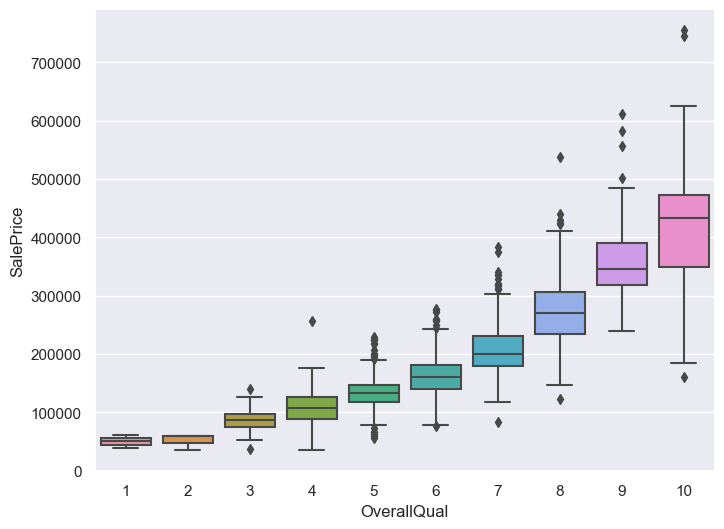

In [12]:
# Membuat boxplot dari data Sales Price & OverallQual
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

In [13]:
# Mencari data dengan kategori terbaik namun dengan harga dibawah 200000
df_train[(df_train['OverallQual']==10)&(df_train['SalePrice']<200000)]

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


**Boxplot antara YearBuilt dengan target variable**

In [14]:
# mencari tahun dibangun & sales pricenya
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)

data

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000
...,...,...
1455,175000,1999
1456,210000,1978
1457,266500,1941
1458,142125,1950


In [15]:
# mencari tahun dibangun yang masih baru
df_train['YearBuilt'].max()

2010

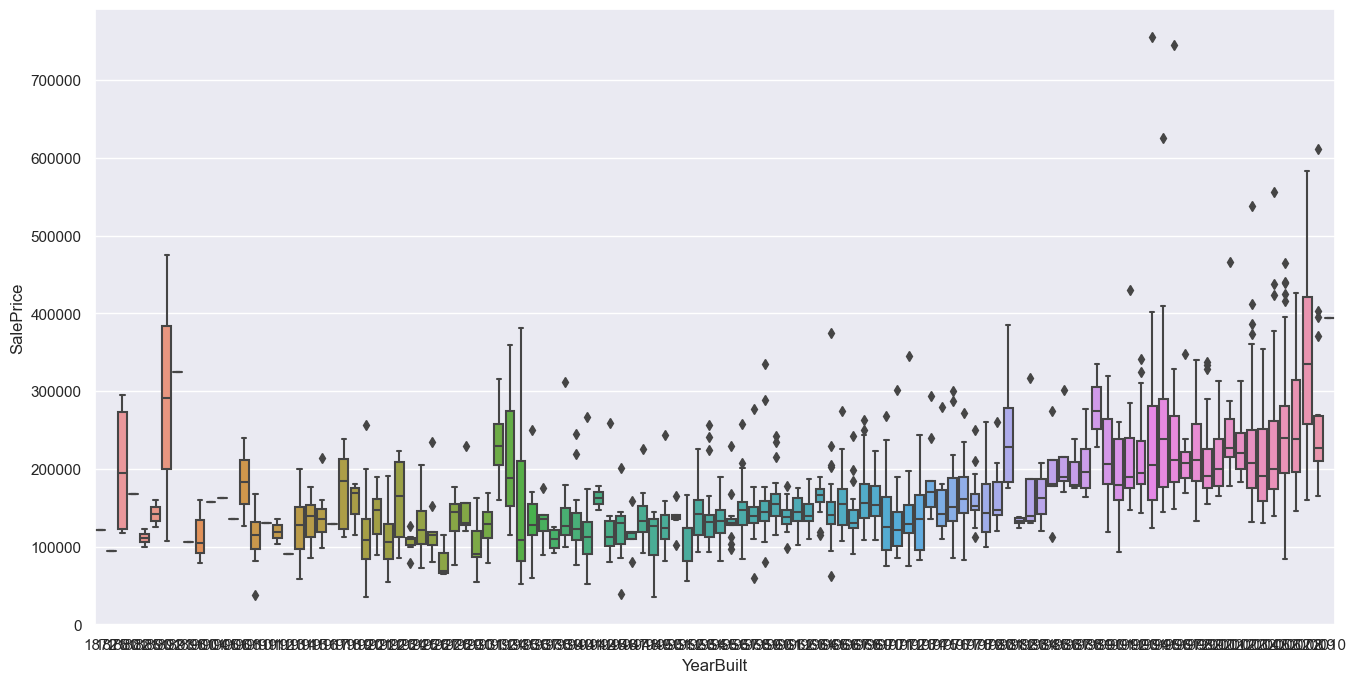

In [16]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)

**Correlation map antar variable**

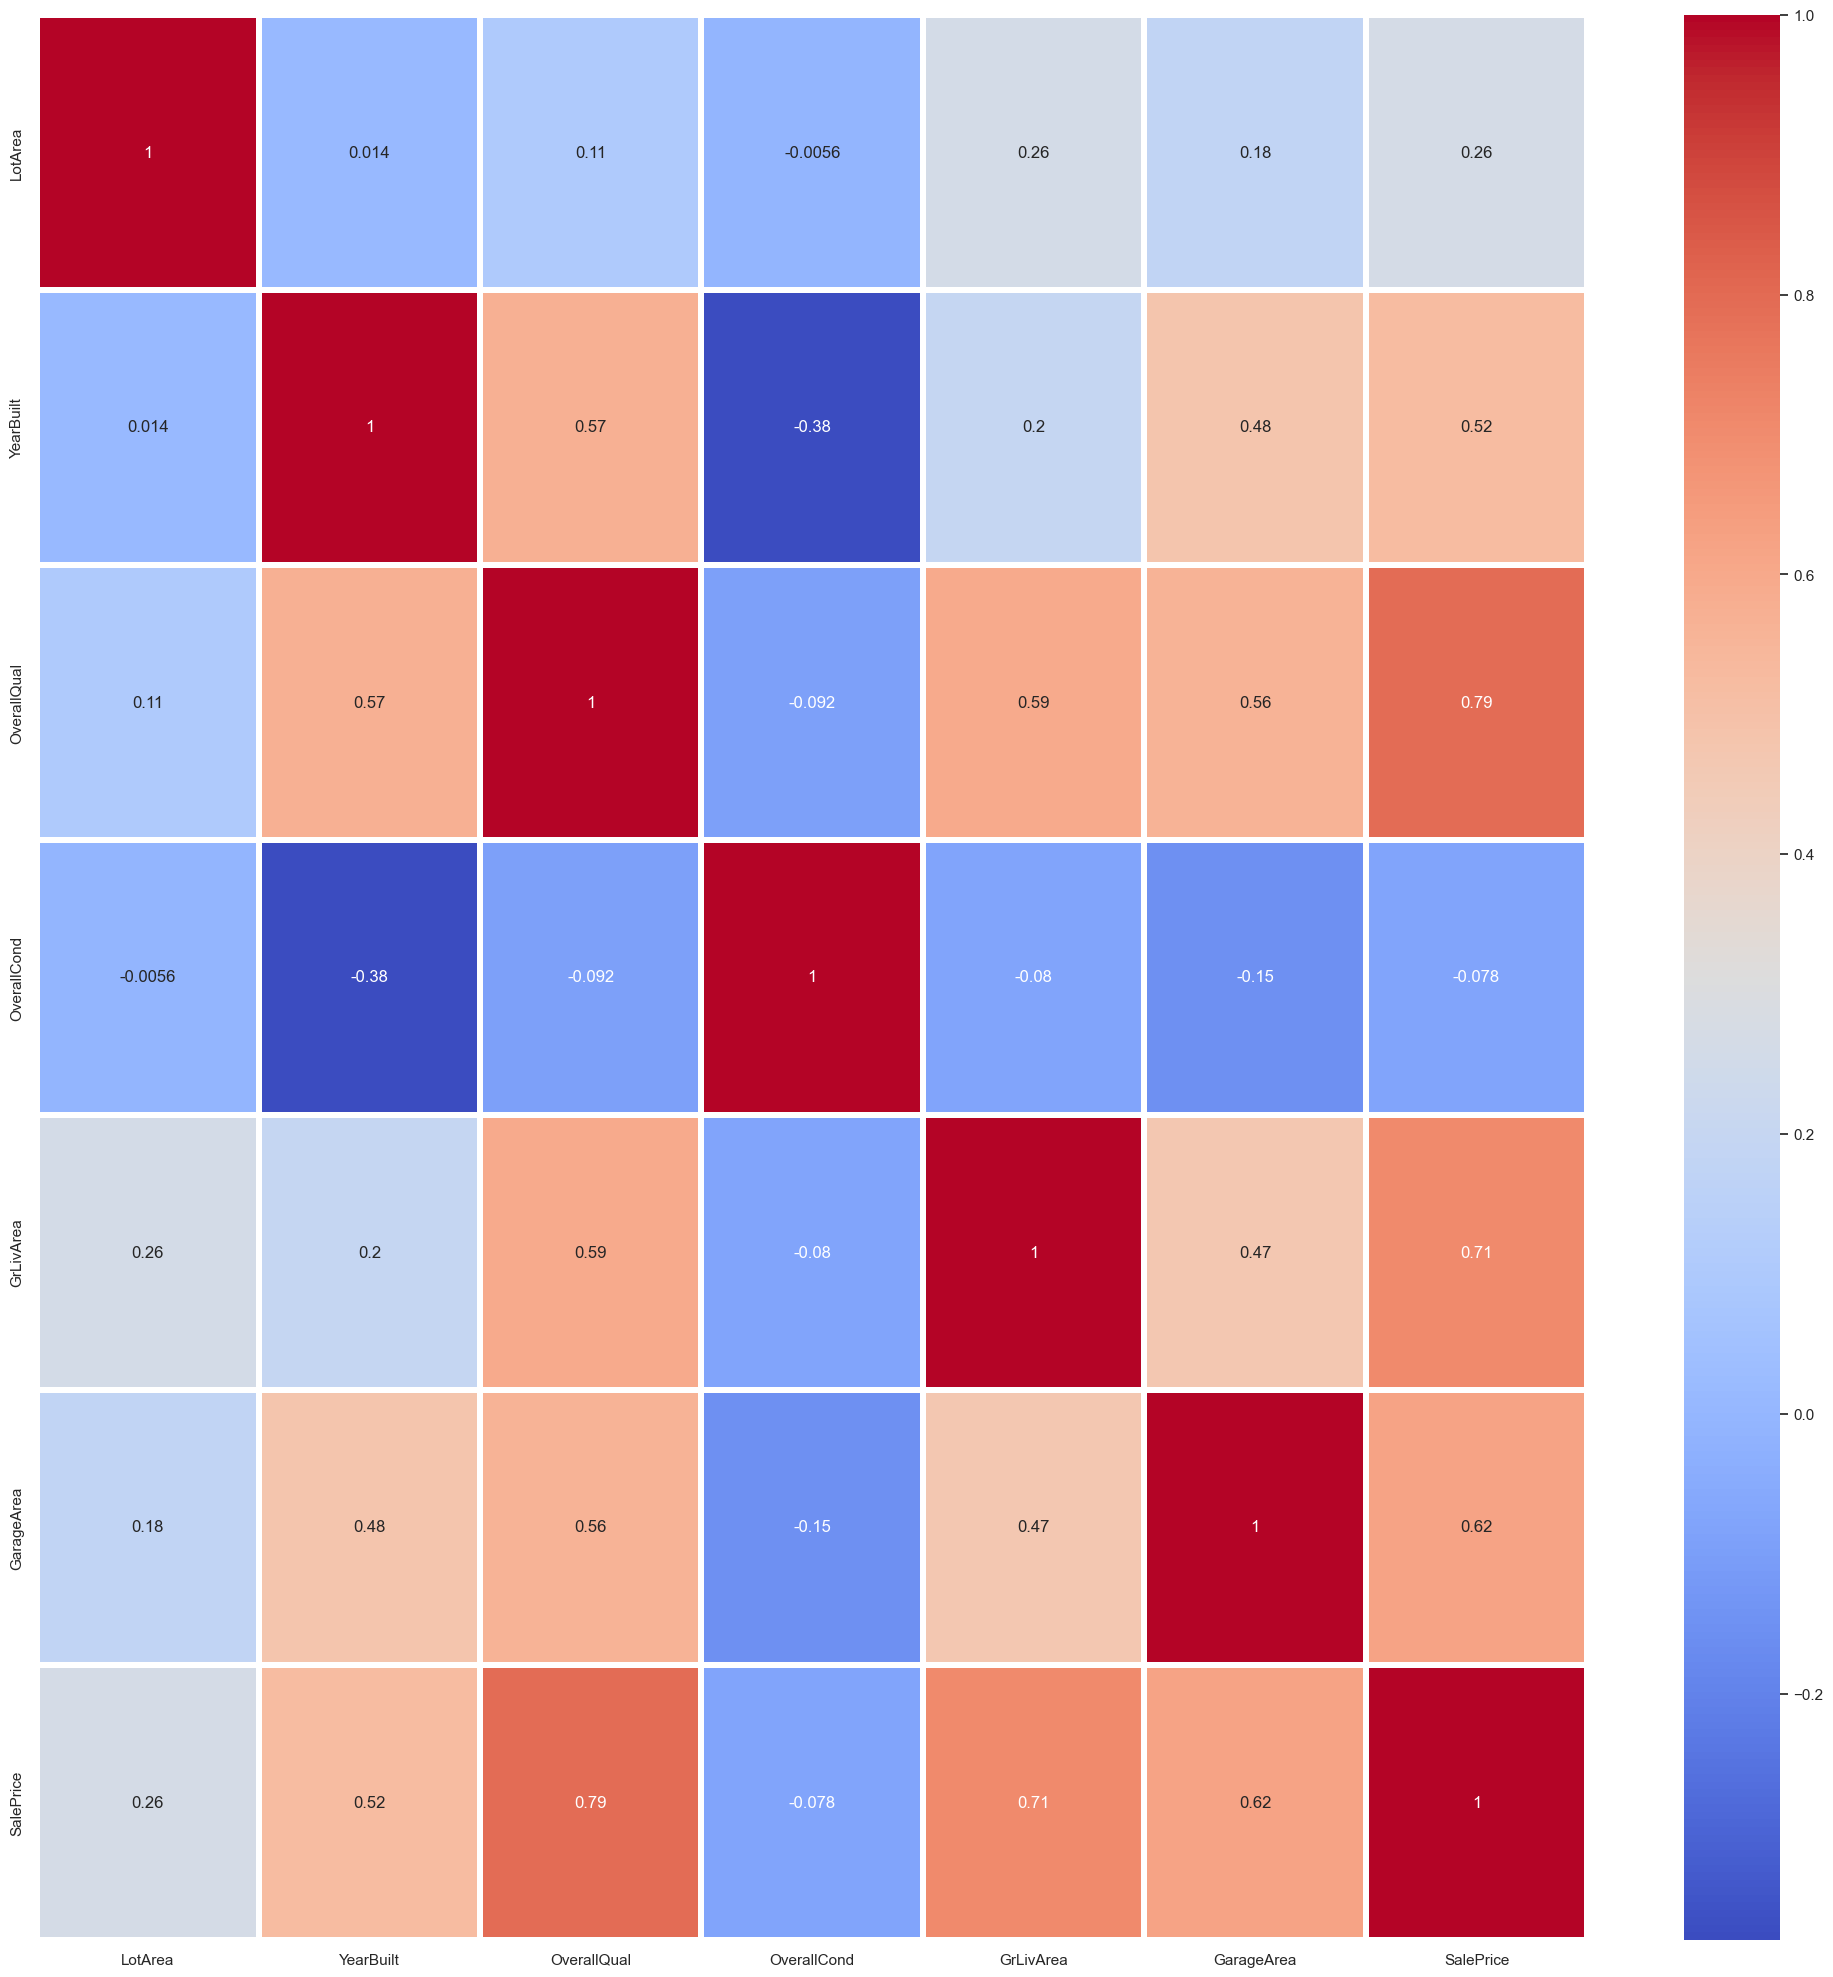

In [17]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(), cmap = "coolwarm", annot=True, linewidth=3.0)

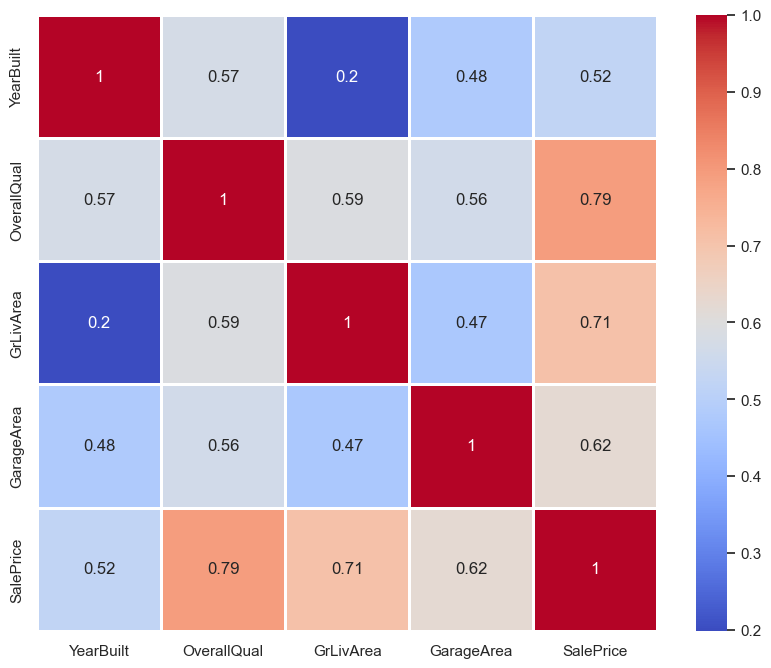

In [18]:
hig_corr = df_train.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot = True, linewidth=1.0)

**Hasil** :
    
semakin tinggi korelasi maka akan semakin mahal Sales Pricenya nya

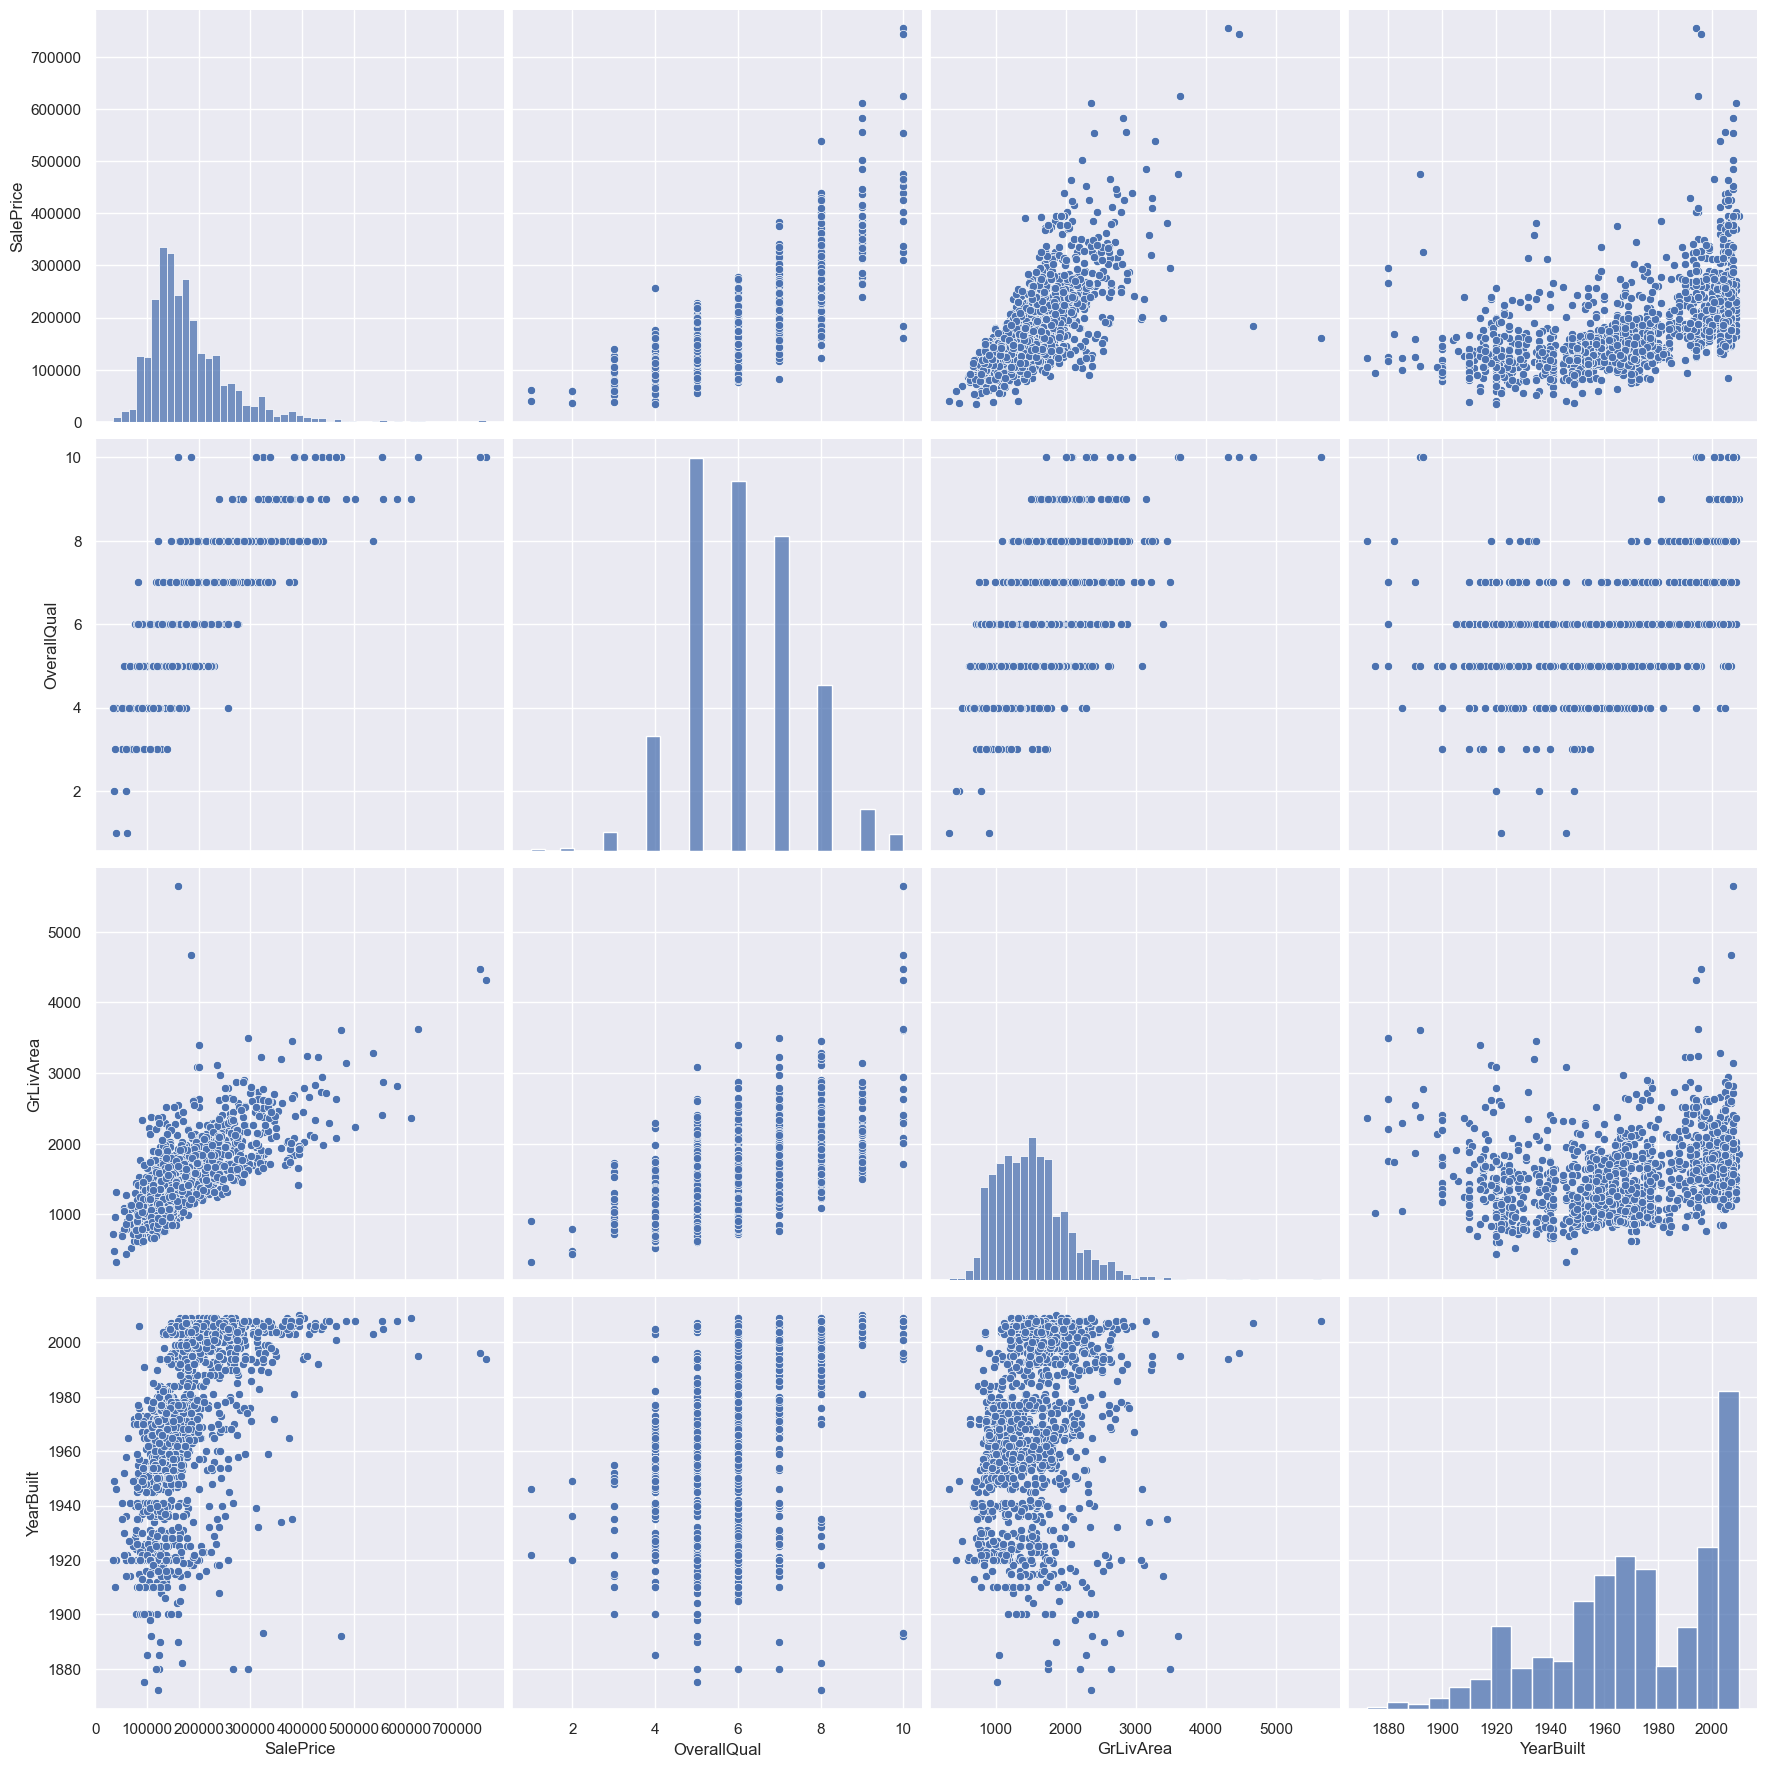

In [19]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 4.5)
plt.show()


# **Target Variable**

**Comparing SalePrice with it's normal distribution**

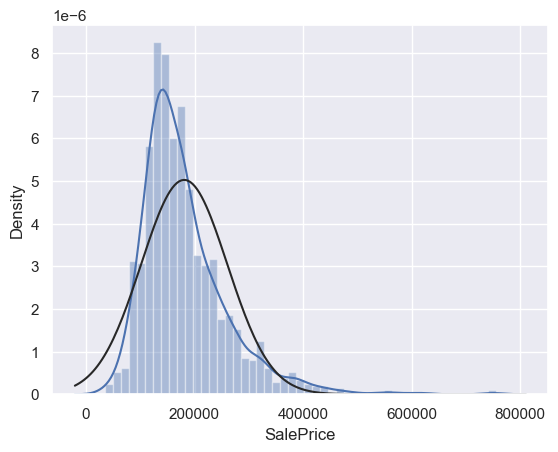

In [20]:
sns.distplot(df_train['SalePrice'], fit = norm);


**keterangan:**

* **Biru** = distribusi sales price kita

* **Hitam** = distribusi sebagai acuan normalnya


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

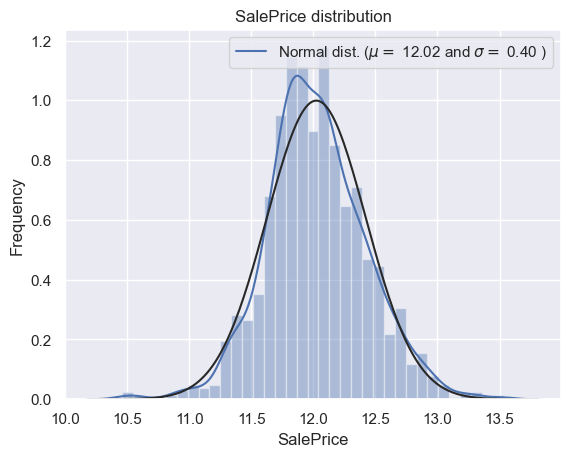

In [22]:
# membuat menjadi normal

# We use the numpy function log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

# Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Print Mu dan Sigma
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot Distribusi
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

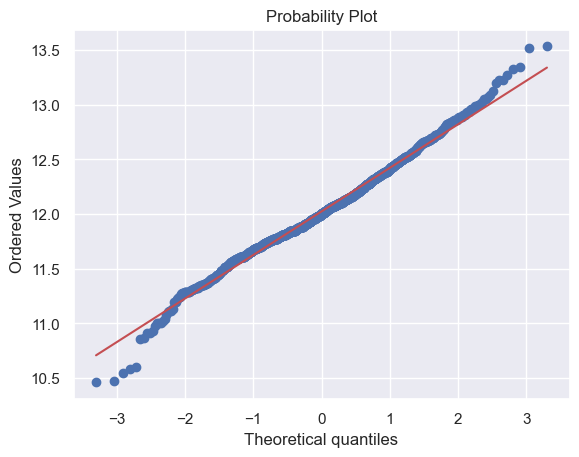

In [25]:
# membuat distribusi regressi Sales Price
# QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()



**Keterangan** :
    
   * **Biru** = distribusi kita
    
   * **Merah** = acuan normal

**Menggabungkan train set dan test set**

In [27]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [28]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,NaN,548.0,Gd
1,9600,1976,6,8,1262,NaN,460.0,TA
2,11250,2001,7,5,1786,NaN,608.0,Gd
3,9550,1915,7,5,1717,NaN,642.0,Gd
4,14260,2000,8,5,2198,NaN,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,NaN,0.0,TA
2915,1894,1970,4,5,1092,NaN,286.0,TA
2916,20000,1960,5,7,1224,NaN,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [29]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [32]:
print(ntrain, ntest)

1460 1459


**Menghitung Missing Value**

In [33]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,0.964029
GarageArea,1,0.000343
KitchenQual,1,0.000343
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000


In [34]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [36]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [35]:
all_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [37]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [40]:
all_data['GarageArea'].unique()

array([ 548.,  460.,  608.,  642.,  836.,  480.,  636.,  484.,  468.,
        205.,  384.,  736.,  352.,  840.,  576.,  516.,  294.,  853.,
        280.,  534.,  572.,  270.,  890.,  772.,  319.,  240.,  250.,
        271.,  447.,  556.,  691.,  672.,  498.,  246.,    0.,  440.,
        308.,  504.,  300.,  670.,  826.,  386.,  388.,  528.,  894.,
        565.,  641.,  288.,  645.,  852.,  558.,  220.,  667.,  360.,
        427.,  490.,  379.,  297.,  283.,  509.,  405.,  758.,  461.,
        400.,  462.,  420.,  432.,  506.,  684.,  472.,  366.,  476.,
        410.,  740.,  648.,  273.,  546.,  325.,  792.,  450.,  180.,
        430.,  594.,  390.,  540.,  264.,  530.,  435.,  453.,  750.,
        487.,  624.,  471.,  318.,  766.,  660.,  470.,  720.,  577.,
        380.,  434.,  866.,  495.,  564.,  312.,  625.,  680.,  678.,
        726.,  532.,  216.,  303.,  789.,  511.,  616.,  521.,  451.,
       1166.,  252.,  497.,  682.,  666.,  786.,  795.,  856.,  473.,
        398.,  500.,

In [41]:
all_data['KitchenQual'].mode()[0]

'TA'

In [42]:
all_data['KitchenQual']

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
2914    TA
2915    TA
2916    TA
2917    TA
2918    TA
Name: KitchenQual, Length: 2919, dtype: object

In [43]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [54]:
all_data['KitchenQual'].isna()[0]

False

In [55]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [57]:

# mengganti Overallcond menjadi kategori 
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [63]:
all_data.OverallCond.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2919 entries, 0 to 2918
Series name: OverallCond
Non-Null Count  Dtype 
--------------  ----- 
2919 non-null   object
dtypes: object(1)
memory usage: 22.9+ KB


# **Feature Engineering**

**Label Encoding**

In [218]:
# Membuat salinan dari data sebelumnya yang sudah di perbaiki
tmp1_data = all_data.copy()

In [219]:
# membuat label kategori pada KitchenQual

print(f'Sebelum label encoding{all_data.KitchenQual.unique()} \n')

# Setelah label encoding kategori
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual') #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(tmp1_data[c].values)) 
    tmp1_data[c] = lbl.transform(list(tmp1_data[c].values))
    encoders[c] = lbl

# shape        
print(f'Setelah label encoding{tmp1_data.KitchenQual.unique()}\n')
print('Shape tmp_data: {}'.format(tmp1_data.shape))

Sebelum label encoding['Gd' 'TA' 'Ex' 'Fa'] 

Setelah label encoding[2 3 0 1]

Shape tmp_data: (2919, 8)


In [220]:
tmp1_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [221]:
tmp1_data['OverallCond'].unique()

array([4, 7, 5, 6, 3, 1, 2, 8, 0])

**Skewness Treatment**

In [222]:
from scipy.stats import norm, skew

numeric_feats = tmp1_data.dtypes[tmp1_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tmp1_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


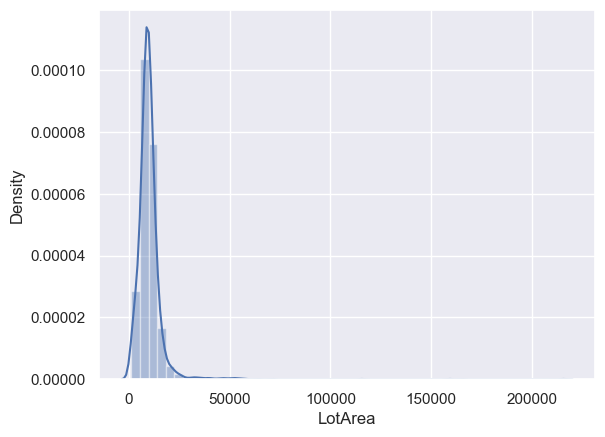

In [227]:
# membuat plot lotarea
sns.distplot(tmp1_data['LotArea']);

In [228]:
# mencari lot area terluas
tmp1_data['LotArea'].max()

215245

**Box Cox Transformation**

In [229]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 3 skewed numerical features to Box Cox transform


In [230]:
skewness

,Skew
LotArea,12.822431
GrLivArea,1.269358
KitchenQual,-1.448023


In [232]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp1_data[feat] = boxcox1p(tmp1_data[feat], lam)

In [233]:
tmp1_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.503637,2003,7,4,17.162564,None,548.0,1.228655
1,26.291998,1976,6,7,15.856944,None,460.0,1.597540
2,27.300424,2001,7,4,17.356042,None,608.0,1.228655
3,26.259338,1915,7,4,17.180669,None,642.0,1.228655
4,28.868815,2000,8,4,18.303173,None,836.0,1.228655
...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,None,0.0,1.597540
2915,17.619961,1970,4,4,15.262547,None,286.0,1.597540
2916,31.239346,1960,5,6,15.729901,None,576.0,1.597540
2917,26.821947,1992,5,4,14.788544,Shed,0.0,1.597540


**Skewness after Box Cox Transformation**

In [234]:
# Check the skew of all numerical features
skewed_feats = tmp1_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088


<Axes: xlabel='LotArea', ylabel='Density'>

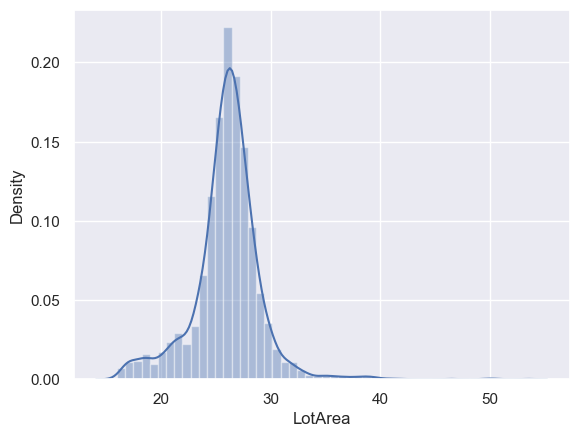

In [235]:
sns.distplot(tmp1_data['LotArea'])

# **One-Hot Encoding**

In [236]:
tmp1_data = pd.get_dummies(tmp1_data, drop_first=True)
print(tmp1_data.shape)

(2919, 11)


In [237]:
tmp1_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548.0,1.228655,1,0,0,0
1,26.291998,1976,6,7,15.856944,460.0,1.597540,1,0,0,0
2,27.300424,2001,7,4,17.356042,608.0,1.228655,1,0,0,0
3,26.259338,1915,7,4,17.180669,642.0,1.228655,1,0,0,0
4,28.868815,2000,8,4,18.303173,836.0,1.228655,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,0.0,1.597540,1,0,0,0
2915,17.619961,1970,4,4,15.262547,286.0,1.597540,1,0,0,0
2916,31.239346,1960,5,6,15.729901,576.0,1.597540,1,0,0,0
2917,26.821947,1992,5,4,14.788544,0.0,1.597540,0,0,1,0


In [238]:
one_hot_columns = tmp1_data.columns

# **SCALLING**

In [239]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp1_data)
tmp1_data = scaler.transform(tmp1_data)
tmp1_data

array([[-0.25487439,  0.63157895,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03551351,  0.06315789,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40696091,  0.58947368,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.85783766, -0.27368421, -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2307166 ,  0.4       , -0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.04198905,  0.42105263,  0.5       , ...,  0.        ,
         0.        ,  0.        ]])

In [240]:
pd.DataFrame(tmp1_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


# **Split Train Test**

In [241]:
X_train = tmp1_data[:ntrain]
X_test = tmp1_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

# **Modelling**

**Kfold and Evaluation Score**

In [242]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score) 
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2) 
    score = [r2_val_score.mean()]
    return score

In [243]:
test_model

<function __main__.test_model(model, X_train=array([[-0.25487439,  0.63157895,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03551351,  0.06315789,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40696091,  0.58947368,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.10169263, -0.67368421,  0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06346978, -0.48421053, -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11531597, -0.16842105, -0.5       , ...,  0.        ,
         0.        ,  0.        ]]), y_train=array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023]))>

**Linear Regression**

In [244]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8273595400084588]

**hasil:**

* Makin mendekati 1 maka model kita baik

**Lasso Regression**

In [245]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.828304803043606]

**Support Vector Machine**

In [246]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8358727426984076]

**XGBoost**

In [104]:
!pip install --upgrade xgboost

In [247]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.827680548136297]

In [248]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


# **Coba Prediksi Data Baru**

In [249]:
model = xgb_reg.fit(X_train, y_train)

In [250]:
model.predict(tmp1_data[0].reshape(1,-1))

array([12.247966], dtype=float32)

In [251]:
np.expm1(12.247966)

208555.6529293021

In [252]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


# **Melakukan prediksi data baru**

In [290]:
new_data = {'LotArea': [8000], 
             'YearBuilt':[2003], 
             'OverallQual':['7'], 
             'OverallCond':['5'], 
             'GrLivArea':[1710],
            'MiscFeature':['None'], 
             'GarageArea': [548], 
             'KitchenQual': ['Gd']}

In [291]:
new = pd.DataFrame(new_data)

In [292]:
new

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2003,7,5,1710,None,548,Gd


In [293]:
new_data['OverallQual'] = encoders['OverallQual'].transform(new['OverallQual'])[0]
new_data['OverallCond'] = encoders['OverallCond'].transform(new['OverallCond'])[0]
new_data['KitchenQual'] = encoders['KitchenQual'].transform(new['KitchenQual'])[0]

In [294]:
new_data

{'LotArea': [8000],
 'YearBuilt': [2003],
 'OverallQual': 7,
 'OverallCond': 4,
 'GrLivArea': [1710],
 'MiscFeature': ['None'],
 'GarageArea': [548],
 'KitchenQual': 2}

In [295]:
new_data['LotArea'] = boxcox1p(new['LotArea'], lam)[0]
new_data['GrLivArea'] = boxcox1p(new['GrLivArea'], lam)[0]
new_data['KitchenQual'] = boxcox1p(new_data['KitchenQual'], lam)

In [296]:
new_data

{'LotArea': 25.171635917057113,
 'YearBuilt': [2003],
 'OverallQual': 7,
 'OverallCond': 4,
 'GrLivArea': 17.162564178531092,
 'MiscFeature': ['None'],
 'GarageArea': [548],
 'KitchenQual': 1.2286546980775868}

In [297]:
new = pd.DataFrame(new_data)
new

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.171636,2003,7,4,17.162564,None,548,1.228655


In [298]:
new = pd.get_dummies(new, columns = ['MiscFeature'])

In [299]:
new

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None
0,25.171636,2003,7,4,17.162564,548,1.228655,1


In [300]:
one_hot_columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [301]:
# Menambahkan kolom-kolom yang hilang pada data baru
for kolom in one_hot_columns:
    if kolom not in new.columns:
        new[kolom] = 0

In [302]:
new

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.171636,2003,7,4,17.162564,548,1.228655,1,0,0,0


In [303]:
new_scaled = scaler.transform(new.loc[0].values.reshape(1,-1))

In [304]:
y = np.expm1(model.predict(new_scaled))
print(y)

[210425.2]
